![1_EcOvxbhodURWEjXXepKYIw[1].png](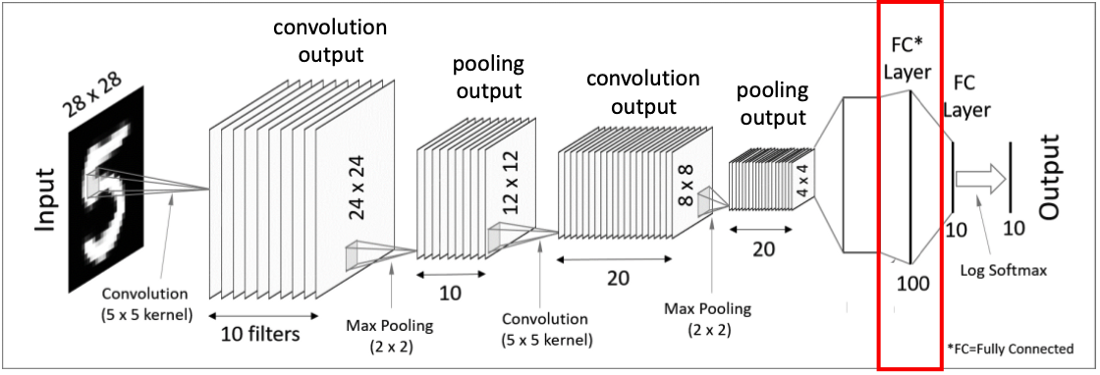)

MNIST CNN(Convolutional Neural Networks) principle

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
 
import numpy as np                 
import matplotlib.pyplot as plt

In [17]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("X_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", x_test.shape)
print("y_test shape", y_test.shape)
x_test[0][0][0]

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


0

In [8]:
X_train = x_train.reshape(60000, 784)
X_test = x_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255                   
X_test /= 255
print("X Training matrix shape", X_train.shape)
print("X Testing matrix shape", X_test.shape)

X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


In [9]:
nb_classes = 10
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)
print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)


Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


In [23]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
activation_15 (Activation)   (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
activation_16 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                2570      
_________________________________________________________________
activation_17 (Activation)   (None, 10)                0         
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
________________________________________________

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2286 - accuracy: 0.9333
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0820 - accuracy: 0.9747
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0526 - accuracy: 0.9838
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0369 - accuracy: 0.9878
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0286 - accuracy: 0.9908
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0210 - accuracy: 0.9929
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0188 - accuracy: 0.9940
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0140 - accuracy: 0.9953
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0148 - accuracy: 0.9951
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0148 - accuracy: 0.9951

In [12]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.1077 - accuracy: 0.9763
Test accuracy: 0.9763000011444092


In [13]:
predicted_classes = np.argmax(model.predict(X_test), axis=1) 
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

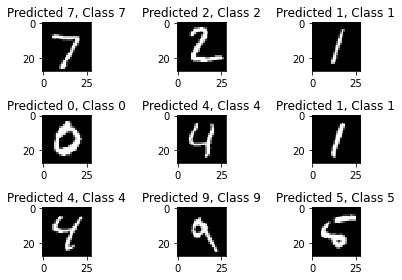

In [39]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.tight_layout()

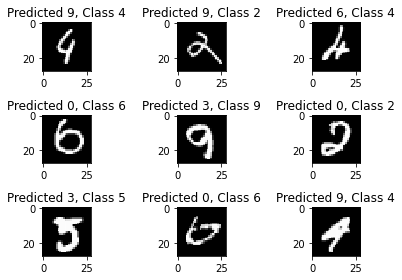

In [14]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
    
plt.tight_layout()